In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
from scipy.stats import linregress



In [135]:
def recta(x,m,b):
    return b+m*x

In [173]:
def r_squared(x,y):
    return np.corrcoef(x,y)[0, 1]**2

In [32]:
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

gaussian(710,8,710,90)


8.0

# PRACTICA 2

In [180]:
Canales = "E4-6_P2.xlsx"
df=pd.read_excel(Canales)
print(df.head())

      Spectrum Name:     Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0       Description:            NaN        NaN        NaN        NaN   
1        Student ID:            NaN        NaN        NaN        NaN   
2     Detector Used:            NaN        NaN        NaN        NaN   
3          Comments:            NaN        NaN        NaN        NaN   
4  Acquisition Mode:  PHA Direct In        NaN        NaN        NaN   

  Unnamed: 5 Unnamed: 6  Channel  Energy  Counts  
0        NaN        NaN      0.0  354.09     0.0  
1        NaN        NaN      1.0  360.98     0.0  
2        NaN        NaN      2.0  367.87     0.0  
3        NaN        NaN      3.0  374.76     0.0  
4        NaN        NaN      4.0  381.65     0.0  


In [181]:
Counts = df[["Channel","Energy" , "Counts"]]
print(Counts)

      Channel  Energy  Counts
0         0.0  354.09     0.0
1         1.0  360.98     0.0
2         2.0  367.87     0.0
3         3.0  374.76     0.0
4         4.0  381.65     0.0
...       ...     ...     ...
1040      NaN     NaN     NaN
1041      NaN     NaN     NaN
1042      NaN     NaN     NaN
1043      NaN     NaN     NaN
1044      NaN     NaN     NaN

[1045 rows x 3 columns]


In [6]:
#grafica= Counts.plot.bar(x="Channel", y="Counts")

In [182]:
Canal=np.array(df["Channel"])
Cuentas=np.array(df["Counts"])
Energy = np.array(df["Energy"])

print(len(Canal))
print(len(Cuentas))
print(len(Energy))
# print(Canal[710:720])
# print(Cuentas[710:720])
print(Canal)
print(Cuentas)
print(Energy)
#Cuentas

1045
1045
1045
[ 0.  1.  2. ... nan nan nan]
[ 0.  0.  0. ... nan nan nan]
[354.09 360.98 367.87 ...    nan    nan    nan]


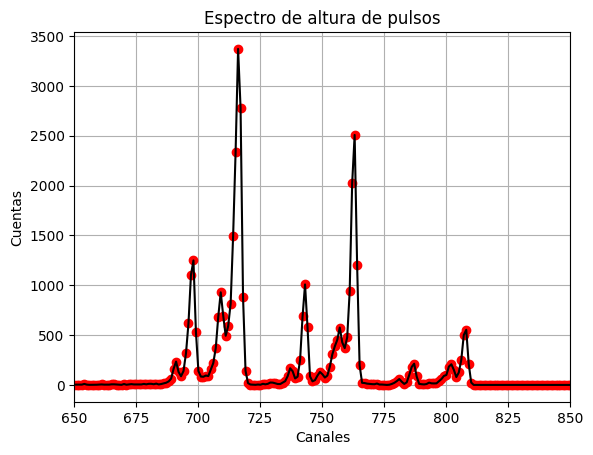

In [183]:
plt.plot(Canal,Cuentas, "or")
plt.plot(Canal,Cuentas, "k")

###PRIMERAS ALFA###
#plt.xlim(711,719)
#plt.ylim(3000,3500)

#plt.xlim(692,702)


###SEGUNDA ALFA###
#plt.xlim(758,766)
#plt.xlim(739,746)

###TERCERA ALFA###
#plt.xlim(805,810)
#plt.xlim(782,790)
#plt.ylim(0,500)

plt.xlim(650,850)
plt.title("Espectro de altura de pulsos")
plt.xlabel("Canales")
plt.ylabel("Cuentas")
plt.grid()

In [34]:
print(Canal[710:720])
print(Cuentas[710:720])
y=[]

for i in Canal[711:720]:
    p = gaussian(float(i),1,1,715)
    #p=type(i)
    print(p)
    y.append(p)
    

[710. 711. 712. 713. 714. 715. 716. 717. 718. 719.]
[ 696.  493.  590.  816. 1496. 2339. 3371. 2780.  880.  142.]
0.6107720635980658
0.6099238027799733
0.6090755286498798
0.6082272445425827
0.6073789537882965
0.6065306597126334
0.6056823656365835
0.6048340748764955
0.6039857907440571


In [188]:
#y=Gaussian(Canal[712], 3200, 3)

###PRIMERAS ALFA###
#plt.xlim(711,719)
#plt.ylim(3000,3500)

#plt.xlim(692,702)


###SEGUNDA ALFA###
#plt.xlim(758,766)
#plt.xlim(739,746)

###TERCERA ALFA###
#plt.xlim(805,810)

#plt.xlim(782,790)
#plt.ylim(0,500)

print("Para 239-Pu")
resultados, covGaus = curve_fit(gaussian, Canal[711:720], Cuentas[711:720], p0=[np.max(Cuentas[711:720]),0, 3371])
#resultados, covGaus = curve_fit(gaussian, Canal[711:720], y)
print("La amplitud es: ",round(resultados[0],3), ", el centroide es: ", round(resultados[1],3),", y la sigma es: ", round(resultados[2],3))
print("Y sus errores son, respectivamente: ", [round(np.sqrt(np.diag(covGaus)[0]),3),round(np.sqrt(np.diag(covGaus)[1]),3), round(np.sqrt(np.diag(covGaus)[2]),3)], "\n")

resultados01, covGaus01 = curve_fit(gaussian, Canal[692:702], Cuentas[692:702], p0=[np.max(Cuentas[692:702]),0, 1249])
#resultados, covGaus = curve_fit(gaussian, Canal[711:720], y)
print("La amplitud es: ",round(resultados01[0],3), ", el centroide es: ", round(resultados01[1],3),", y la sigma es: ", round(resultados01[2],3))
print("Y sus errores son, respectivamente: ", [round(np.sqrt(np.diag(covGaus01)[0]),3),round(np.sqrt(np.diag(covGaus01)[1]),3), round(np.sqrt(np.diag(covGaus01)[2]),3)], "\n")

print("Para 241-Am")
resultados1, covGaus1 = curve_fit(gaussian, Canal[758:766], Cuentas[758:766], p0=[np.max(Cuentas[758:766]),0, 2508])
#resultados, covGaus = curve_fit(gaussian, Canal[711:720], y)
print("La amplitud es: ",round(resultados1[0],3), ", el centroide es: ", round(resultados1[1],3),", y la sigma es: ", round(resultados1[2],3))
print("Y sus errores son, respectivamente: ", [round(np.sqrt(np.diag(covGaus1)[0]),3),round(np.sqrt(np.diag(covGaus1)[1]),3), round(np.sqrt(np.diag(covGaus1)[2]),3)], "\n")

resultados11, covGaus11 = curve_fit(gaussian, Canal[739:756], Cuentas[739:756], p0=[np.max(Cuentas[739:756]),0, 1008])
#resultados, covGaus = curve_fit(gaussian, Canal[711:720], y)
print("La amplitud es: ",round(resultados11[0],3), ", el centroide es: ", round(resultados11[1],3),", y la sigma es: ", round(resultados11[2],3))
print("Y sus errores son, respectivamente: ", [round(np.sqrt(np.diag(covGaus11)[0]),3),round(np.sqrt(np.diag(covGaus11)[1]),3), round(np.sqrt(np.diag(covGaus11)[2]),3)], "\n")

print("Para 244-Cm")
resultados2, covGaus2 = curve_fit(gaussian, Canal[805:810], Cuentas[805:810], p0=[np.max(Cuentas[805:810]),0, 553])
#resultados, covGaus = curve_fit(gaussian, Canal[711:720], y)
print("La amplitud es: ",round(resultados2[0],3), ", el centroide es: ", round(resultados2[1],3),", y la sigma es: ", round(resultados2[2],3))
print("Y sus errores son, respectivamente: ", [round(np.sqrt(np.diag(covGaus2)[0]),3),round(np.sqrt(np.diag(covGaus2)[1]),3), round(np.sqrt(np.diag(covGaus2)[2]),3)],"\n")

resultados21, covGaus21 = curve_fit(gaussian, Canal[782:790], Cuentas[782:790], p0=[np.max(Cuentas[782:790]),0, 213])
#resultados, covGaus = curve_fit(gaussian, Canal[711:720], y)
print("La amplitud es: ",round(resultados21[0],3), ", el centroide es: ", round(resultados21[1],3),", y la sigma es: ", round(resultados21[2],3))
print("Y sus errores son, respectivamente: ", [round(np.sqrt(np.diag(covGaus21)[0]),3),round(np.sqrt(np.diag(covGaus21)[1]),3), round(np.sqrt(np.diag(covGaus21)[2]),3)],"\n")

Para 239-Pu
La amplitud es:  3234.713 , el centroide es:  715.885 , y la sigma es:  1.503
Y sus errores son, respectivamente:  [303.371, 0.163, 0.164] 

La amplitud es:  1237.398 , el centroide es:  697.445 , y la sigma es:  1.305
Y sus errores son, respectivamente:  [84.225, 0.103, 0.103] 

Para 241-Am
La amplitud es:  2476.513 , el centroide es:  762.621 , y la sigma es:  1.182
Y sus errores son, respectivamente:  [249.947, 0.138, 0.139] 

La amplitud es:  999.112 , el centroide es:  742.862 , y la sigma es:  1.069
Y sus errores son, respectivamente:  [139.201, 0.172, 0.172] 

Para 244-Cm
La amplitud es:  567.214 , el centroide es:  807.464 , y la sigma es:  1.183
Y sus errores son, respectivamente:  [52.204, 0.126, 0.137] 

La amplitud es:  216.412 , el centroide es:  786.517 , y la sigma es:  1.143
Y sus errores son, respectivamente:  [16.369, 0.1, 0.1] 



In [142]:
###PRIMERAS ALFA###
#plt.xlim(711,719)
#plt.ylim(3000,3500)

#plt.xlim(692,702)


###SEGUNDA ALFA###
#plt.xlim(758,766)

#plt.xlim(739,746)

###TERCERA ALFA###
#plt.xlim(805,810)
#plt.xlim(782,790)
#plt.ylim(0,500)



x_fit1=np.linspace(710,725)
x_fit11=np.linspace(692,702)

x_fit2=np.linspace(758,766)
x_fit21=np.linspace(739,746)

x_fit3=np.linspace(805,810)
x_fit31=np.linspace(782,790)

y_fit1=[]
y_fit2=[]
y_fit3=[]

y_fit11=[]
y_fit21=[]
y_fit31=[]
print(gaussian(700,resultados[0],resultados[1],resultados[2]))

for i in x_fit1:
    T = gaussian(i,resultados[0],resultados[1],resultados[2])
    y_fit1.append(T)

for i in x_fit2:
    T = gaussian(i,resultados1[0],resultados1[1],resultados1[2])
    y_fit2.append(T)

for i in x_fit3:
    T = gaussian(i,resultados2[0],resultados2[1],resultados2[2])
    y_fit3.append(T)

for i in x_fit11:
    T = gaussian(i,resultados01[0],resultados01[1],resultados01[2])
    y_fit11.append(T)

for i in x_fit21:
    T = gaussian(i,resultados11[0],resultados11[1],resultados11[2])
    y_fit21.append(T)

for i in x_fit31:
    T = gaussian(i,resultados21[0],resultados21[1],resultados21[2])
    y_fit31.append(T)

#print(y_fit)

1.858770631550077e-21


1.858770631550077e-21


Text(0, 0.5, 'Cuentas')

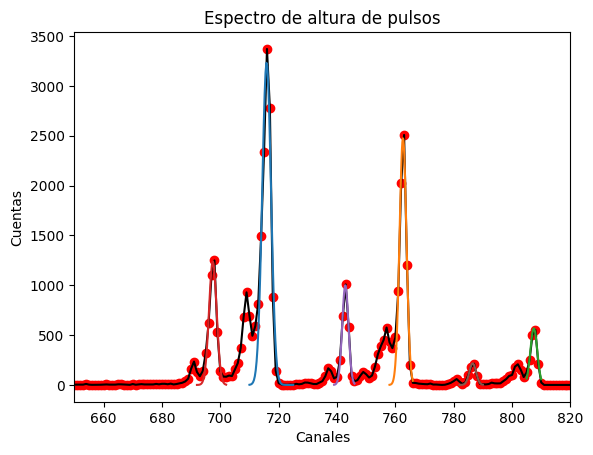

In [143]:
print(gaussian(700,resultados[0],resultados[1],resultados[2]))

#print(y_fit)

plt.plot(Canal,Cuentas, "or")
plt.plot(Canal,Cuentas, "k")

plt.plot(x_fit1, y_fit1)
plt.plot(x_fit2, y_fit2)
plt.plot(x_fit3, y_fit3)

plt.plot(x_fit11, y_fit11)
plt.plot(x_fit21, y_fit21)
plt.plot(x_fit31, y_fit31)

#plt.xlim(711,719)
#plt.ylim(3000,3500)

plt.xlim(650,820)
plt.title("Espectro de altura de pulsos")
plt.xlabel("Canales")
plt.ylabel("Cuentas")

## Ajuste Lineal

In [146]:
#canales_centroides = [697.46, 715.89, 742.86, 762.62, 786.52, 807.46]
canales_centroides = [692, 715, 742, 762, 786, 807]
#energias = [5105.5, 5156.59, 5388, 5885.56, 5762.64 ,5804.77]

energias = [5144.3, 5156.59, 5442.8, 5885.56, 5762.64 ,5804.77]

popt, pcov = curve_fit(recta, canales_centroides, energias)

print("Los parámetros de ajuste son: ", popt)
print(pcov)
print("Los errores de los parámetros de ajuste son:", [np.sqrt(pcov[0][0]),np.sqrt(pcov[1][1])])


y_fits = []
x=np.linspace(0,900)
for i in x:
    p=recta(i, popt[0], popt[1])
    y_fits.append(p)

#print(y_fits)

def calibr(Ch):
    E = 6.899*Ch+354.09
    return E

Los parámetros de ajuste son:  [  6.89878935 354.08546149]
[[ 2.87253608e+00 -2.15631716e+03]
 [-2.15631716e+03  1.62314673e+06]]
Los errores de los parámetros de ajuste son: [1.6948557686580343, 1274.0277583510301]


Text(0.5, 1.0, 'Gráfica con ajuste Lineal')

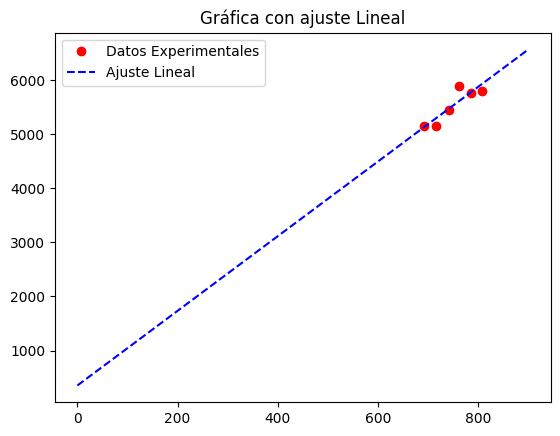

In [145]:

plt.plot(canales_centroides,energias, "or", label="Datos Experimentales" )
plt.plot(x,y_fits, "b--", label="Ajuste Lineal")
#plt.xlim(500,850)

plt.legend()
plt.title("Gráfica con ajuste Lineal")
#plt.xlabel("")

In [186]:
slope, intercept, r_value, p_value, std_err = linregress(Canal[0:1023], Energy[:1023])
print(f"R-squared: {r_value ** 2:.4f}")

R-squared: 1.0000


Text(0, 0.5, 'Cuentas')

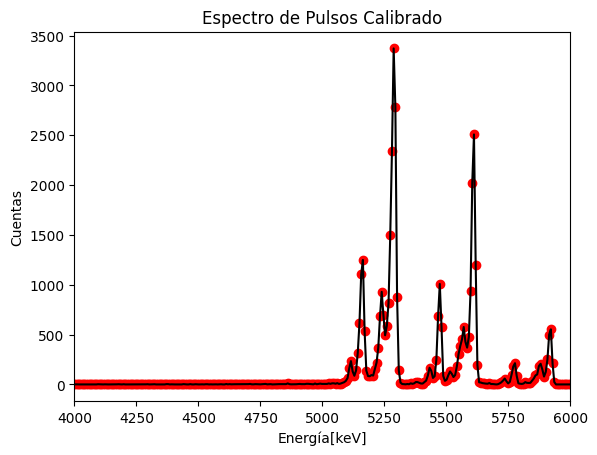

In [186]:
plt.plot(Energy,Cuentas, "or")
plt.plot(Energy,Cuentas, "k")
plt.xlim(4000,6000)
#plt.xlim(5200,5000)

plt.title("Espectro de Pulsos Calibrado")
plt.xlabel("Energía[keV]")
plt.ylabel("Cuentas")

Text(0, 0.5, 'Cuentas')

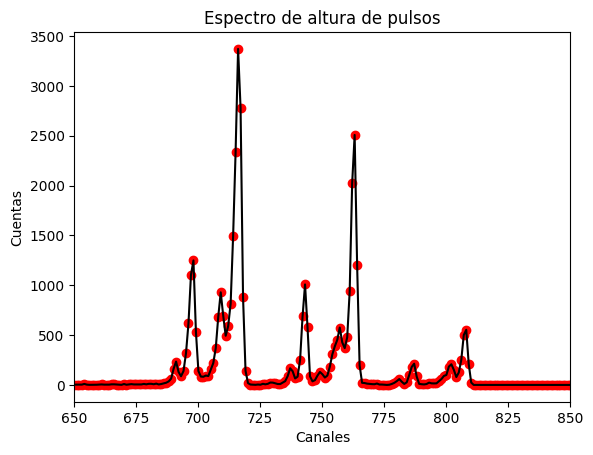

In [110]:
plt.plot(Canal,Cuentas, "or")
plt.plot(Canal,Cuentas, "k")
plt.xlim(650,850)
plt.title("Espectro de altura de pulsos")
plt.xlabel("Canales")
plt.ylabel("Cuentas")

In [154]:
E0=[]

for i in canales_centroides:
    p=calibr(i)
    E0.append(p)
print(E0)
FWHM=[4,4,4,4,3,3]

Resolucion=[]
for i in FWHM[:3]:
    T = i/E0[i]
    Resolucion.append(T)

print(Resolucion)



[5128.198, 5286.875, 5473.148, 5611.128000000001, 5776.704, 5921.5830000000005]
[0.0006924363789455025, 0.0006924363789455025, 0.0006924363789455025]


In [163]:
print(energias)
print(E0, "\n")

for i in range(0,6):
    K = (energias[i]-E0[i])*100/energias[i]
    print(K)

[5144.3, 5156.59, 5442.8, 5885.56, 5762.64, 5804.77]
[5128.198, 5286.875, 5473.148, 5611.128000000001, 5776.704, 5921.5830000000005] 

0.3130066286958354
-2.5265727932606596
-0.557580657014771
4.66280184043659
-0.24405480821289194
-2.012362246910732


In [11]:
x_data = [ -7.0, -6.0, -10.0, -9.0, -8.0, -1.0, 0.0, 1.0, 2.0, -5.0, -4.0, -3.0, -2.0, 7.0, 8.0, 3.0, 4.0, 5.0, 6.0, 9.0, 10.0]
y_data = [ 8.3, 10.6,1.2, 4.2, 6.7, 15.7, 16.1, 16.6, 11.7, 13.5, 14.5, 16.0, 12.7, 10.3, 8.6, 15.4, 14.4, 14.2, 6.1, 3.9, 2.1]
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)
#plt.plot(x_data, y_data, 'o')

16.36955785658924 0.014266431490531582


C:\Users\Dell\AppData\Local\Temp\ipykernel_11476\2073268180.py:2: RuntimeWarning: overflow encountered in exp
  R = a * np.exp(-b * x**2)


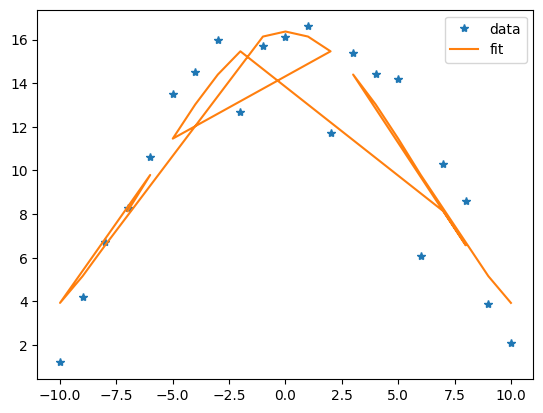

In [12]:
params, cov = curve_fit(gaussian, x_data, y_data)
  
fitA = params[0]
fitB = params[1]
print(fitA,fitB)
fity = gaussian(x_data, fitA, fitB)
plt.plot(x_data, y_data, '*', label="data")
plt.plot(x_data, fity, '-', label="fit")
plt.legend()

# Practica 3